In [1]:
#Importação das bibliotecas utilizadas na análise
import terality as trl
import pandas as pd
import seaborn as sns
import statistics as st
import plotly.express as pltx

In [2]:
#Definir opções de exibição dos dados
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
#Importação dos dados de localização dos municipios por código ibge
df_munic_ibge = pd.read_csv('https://raw.githubusercontent.com/barbosa-adriano/enem2019/main/municipios.csv',
                      sep=',',
                      skipinitialspace=True, #Tira o espaço no começo do texto
                      skip_blank_lines=True, #Desconsidera as linhas em branco
                      quotechar='"', #Define o caracter que indica um texto
                      on_bad_lines='warn', #Só avisa linhas com erro
                      encoding='utf-8',
                      encoding_errors='replace')

In [4]:
#Importação dos dados base do ENEM 2019
df_enem = pd.read_csv('microdados_enem_2019\DADOS\MICRODADOS_ENEM_2019.csv',
                      sep=';',
                      skipinitialspace=True, #Tira o espaço no começo do texto
                      skip_blank_lines=True, #Desconsidera as linhas em branco
                      quotechar='"', #Define o caracter que indica um texto
                      on_bad_lines='warn', #Só avisa linhas com erro
                      encoding='utf-8',
                      encoding_errors='replace')

In [5]:
df_enem.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(25), int64(70), object(41)
memory usage: 16.1 GB


In [6]:
df_enem.head(10)

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  \
0  190001595656    2019                  3552205                Sorocaba   
1  190001421546    2019                  2910800        Feira de Santana   
2  190001133210    2019                  2304400               Fortaleza   
3  190001199383    2019                  1721000                  Palmas   
4  190001237802    2019                  3118601                Contagem   
5  190001782198    2019                  5107602            Rondon�polis   
6  190001421548    2019                  2924009            Paulo Afonso   
7  190001595657    2019                  3550308               S�o Paulo   
8  190001592264    2019                  3550308               S�o Paulo   
9  190001592266    2019                  3550308               S�o Paulo   

   CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  \
0                35               SP      36.0       M                1   
1                29               BA      23.0       M                1   
2                23               CE      39.0       F                1   
3                17               TO      25.0       F                1   
4                31               MG      22.0       F                1   
5                51               MT      37.0       M                2   
6                29               BA      22.0       F                1   
7                35               SP      20.0       M                1   
8                35               SP      20.0       F                1   
9                35               SP      17.0       M                1   

   TP_COR_RACA  TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO  \
0            3                 1                2914802.0   
1            1                 1                2910800.0   
2            3                 1                2304400.0   
3            1                 1                1721000.0   
4            1                 1                3118601.0   
5            2                 1                5107602.0   
6            3                 1                2924009.0   
7            3                 1                3550308.0   
8            1                 1                3550308.0   
9            1                 1                3550308.0   

  NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  \
0                 Itabuna              29.0               BA                1   
1        Feira de Santana              29.0               BA                1   
2               Fortaleza              23.0               CE                1   
3                  Palmas              17.0               TO                1   
4                Contagem              31.0               MG                1   
5            Rondon�polis              51.0               MT                1   
6            Paulo Afonso              29.0               BA                1   
7               S�o Paulo              35.0               SP                1   
8               S�o Paulo              35.0               SP                1   
9               S�o Paulo              35.0               SP                2   

   TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_ESCOLA  \
0               11          1        NaN             0        NaN   
1                5          1        1.0             0        NaN   
2               13          1        1.0             0        NaN   
3                4          1        NaN             0        NaN   
4                4          1        1.0             0        NaN   
5               13          1        NaN             0        NaN   
6                5          1        1.0             0        NaN   
7                1          1        NaN             0        NaN   
8                1          1        1.0             0        NaN   
9                0          2        1.0             0        NaN   

   CO_MUNICIPIO_

In [7]:
df_enem_edit = df_enem.reindex()

In [8]:
df_enem_edit.describe()

NU_INSCRICAO     NU_ANO  CO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  \
count  5.095270e+06  5095270.0             5.095270e+06      5.095270e+06   
mean   1.900036e+11     2019.0             3.086472e+06      3.071407e+01   
std    1.471023e+06        0.0             9.973604e+05      9.943231e+00   
min    1.900010e+11     2019.0             1.100015e+06      1.100000e+01   
25%    1.900023e+11     2019.0             2.405108e+06      2.400000e+01   
50%    1.900036e+11     2019.0             3.124203e+06      3.100000e+01   
75%    1.900048e+11     2019.0             3.549904e+06      3.500000e+01   
max    1.900061e+11     2019.0             5.300108e+06      5.300000e+01   

           NU_IDADE  TP_ESTADO_CIVIL   TP_COR_RACA  TP_NACIONALIDADE  \
count  5.095201e+06     5.095270e+06  5.095270e+06      5.095270e+06   
mean   2.208764e+01     1.075276e+00  2.128251e+00      1.030254e+00   
std    7.454793e+00     4.388921e-01  1.017512e+00      2.097910e-01   
min    1.000000e+01     0.000000e+00  0.000000e+00      0.000000e+00   
25%    1.800000e+01     1.000000e+00  1.000000e+00      1.000000e+00   
50%    1.900000e+01     1.000000e+00  2.000000e+00      1.000000e+00   
75%    2.400000e+01     1.000000e+00  3.000000e+00      1.000000e+00   
max    9.400000e+01     4.000000e+00  5.000000e+00      4.000000e+00   

       CO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO  TP_ST_CONCLUSAO  \
count             4.950021e+06      4.950021e+06     5.095270e+06   
mean              3.059766e+06      3.044658e+01     1.541402e+00   
std               9.840263e+05      9.806733e+00     7.166870e-01   
min               1.100015e+06      1.100000e+01     1.000000e+00   
25%               2.314102e+06      2.300000e+01     1.000000e+00   
50%               3.110806e+06      3.100000e+01     1.000000e+00   
75%               3.548708e+06      3.500000e+01     2.000000e+00   
max               5.300108e+06      5.300000e+01     4.000000e+00   

       TP_ANO_CONCLUIU     TP_ESCOLA     TP_ENSINO  IN_TREINEIRO  \
count     5.095270e+06  5.095270e+06  2.878197e+06  5.095270e+06   
mean      2.962462e+00  1.330606e+00  1.004794e+00  1.210275e-01   
std       4.108758e+00  5.541871e-01  6.907487e-02  3.261593e-01   
min       0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%       0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
50%       1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
75%       4.000000e+00  2.000000e+00  1.000000e+00  0.000000e+00   
max       1.300000e+01  3.000000e+00  2.000000e+00  1.000000e+00   

          CO_ESCOLA  CO_MUNICIPIO_ESC     CO_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
count  1.147412e+06      1.147412e+06  1.147412e+06            1.147412e+06   
mean   3.126575e+07      3.128667e+06  3.113282e+01            2.252067e+00   
std    9.658639e+06      9.695198e+05  9.665164e+00            7.486917e-01   
min    1.100006e+07      1.100015e+06  1.100000e+01            1.000000e+00   
25%    2.356441e+07      2.314102e+06  2.300000e+01            2.000000e+00   
50%    3.117170e+07      3.148004e+06  3.100000e+01            2.000000e+00   
75%    3.516130e+07      3.550308e+06  3.500000e+01            2.000000e+00   
max    5.308802e+07      5.300108e+06  5.300000e+01            4.000000e+00   

       TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO   IN_CEGUEIRA  \
count        1.147412e+06     1.147412e+06    5.095270e+06  5.095270e+06   
mean         1.036204e+00     1.005607e+00    1.217011e-03  1.403262e-04   
std          1.867977e-01     1.193746e-01    3.486445e-02  1.184511e-02   
min          1.000000e+00     1.000000e+00    0.000000e+00  0.000000e+00   
25%          1.000000e+00     1.000000e+00    0.000000e+00  0.000000e+00   
50%          1.000000e+00     1.000000e+00    0.000000e+00  0.000000e+00   
75%          1.000000e+00     1.000000e+00    0.000000e+00  0.000000e+00   
max          2.000000e+00     4.000000e+00    1.000000e+00  1.000000e+00   

          IN_SURDEZ  IN_DEFICIEN

In [9]:
df_enem_edit.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [10]:
#Serão retiradas as respostas das perguntas especificas do data set para diminuir a quantidade de dados e 
# análisar de forma mais organica as notas finais
df_enem_edit = df_enem_edit[df_enem_edit.columns.drop(['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH',
                  'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH',
                  'TX_GABARITO_LC','TX_GABARITO_MT','Q001', 'Q002',
                  'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',
                  'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
                  'Q021', 'Q022', 'Q023', 'Q024', 'Q025'])]

In [11]:
#Verifica todos os registros nulos
df_enem_edit.isnull().sum()

NU_INSCRICAO                         0
NU_ANO                               0
CO_MUNICIPIO_RESIDENCIA              0
NO_MUNICIPIO_RESIDENCIA              0
CO_UF_RESIDENCIA                     0
SG_UF_RESIDENCIA                     0
NU_IDADE                            69
TP_SEXO                              0
TP_ESTADO_CIVIL                      0
TP_COR_RACA                          0
TP_NACIONALIDADE                     0
CO_MUNICIPIO_NASCIMENTO         145249
NO_MUNICIPIO_NASCIMENTO         145249
CO_UF_NASCIMENTO                145249
SG_UF_NASCIMENTO                145249
TP_ST_CONCLUSAO                      0
TP_ANO_CONCLUIU                      0
TP_ESCOLA                            0
TP_ENSINO                      2217073
IN_TREINEIRO                         0
CO_ESCOLA                      3947858
CO_MUNICIPIO_ESC               3947858
NO_MUNICIPIO_ESC               3947858
CO_UF_ESC                      3947858
SG_UF_ESC                      3947858
TP_DEPENDENCIA_ADM_ESC   

In [12]:
#Tratamentos dos dados nulos
#Para os campos abaixo foi utilizada a mediana
df_enem_edit['NU_IDADE'].fillna(df_enem_edit['NU_IDADE'].median(), inplace=True)

#Para os campos de nascimento foi replicada a informação de residencia
df_enem_edit['CO_MUNICIPIO_NASCIMENTO'].fillna(df_enem_edit['CO_MUNICIPIO_RESIDENCIA'], inplace=True)
df_enem_edit['NO_MUNICIPIO_NASCIMENTO'].fillna(df_enem_edit['NO_MUNICIPIO_RESIDENCIA'], inplace=True)
df_enem_edit['CO_UF_NASCIMENTO'].fillna(df_enem_edit['CO_UF_RESIDENCIA'], inplace=True)
df_enem_edit['SG_UF_NASCIMENTO'].fillna(df_enem_edit['SG_UF_RESIDENCIA'], inplace=True)


#Para os campos abaixo foram utilizados valores de referência fixos
#Para os códigos não preenchidos foi utilizado -1 e NA
df_enem_edit['TP_ENSINO'].fillna(-1, inplace=True)  #1=Ensino Regular
df_enem_edit['CO_ESCOLA'].fillna(-1, inplace=True)  #Código da escola - alterado de null para -1
df_enem_edit['CO_MUNICIPIO_ESC'].fillna(-1, inplace=True)  
df_enem_edit['NO_MUNICIPIO_ESC'].fillna('NA', inplace=True) 
df_enem_edit['CO_UF_ESC'].fillna(-1, inplace=True) 
df_enem_edit['SG_UF_ESC'].fillna('NA', inplace=True) 
df_enem_edit['TP_DEPENDENCIA_ADM_ESC'].fillna(-1, inplace=True) 
df_enem_edit['TP_LOCALIZACAO_ESC'].fillna(-1, inplace=True) 
df_enem_edit['TP_SIT_FUNC_ESC'].fillna(-1, inplace=True) 

#As provas não realizadas possuiam os dados nulos, os mesmo foram substituidos para -1
df_enem_edit['CO_PROVA_CN'].fillna(-1, inplace=True) 
df_enem_edit['CO_PROVA_CH'].fillna(-1, inplace=True) 
df_enem_edit['CO_PROVA_LC'].fillna(-1, inplace=True) 
df_enem_edit['CO_PROVA_MT'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_CN'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_CH'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_LC'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_MT'].fillna(-1, inplace=True) 

#As redações não realizadas possuiam os dados nulos, os mesmo foram substituidos para -1
df_enem_edit['TP_STATUS_REDACAO'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_COMP1'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_COMP2'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_COMP3'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_COMP4'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_COMP5'].fillna(-1, inplace=True) 
df_enem_edit['NU_NOTA_REDACAO'].fillna(-1, inplace=True) 

In [13]:
#Gera uma matriz de correlação entre os campos
df_correlacao = df_enem_edit.corr()

In [14]:
#Serão análisadas as colunas dos dados de presença e notas das provas
df_correlacao[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT',
              'CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','NU_NOTA_CN',
              'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','TP_STATUS_REDACAO',
              'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4',
              'NU_NOTA_COMP5','NU_NOTA_REDACAO']].reset_index(drop=False)

index  TP_PRESENCA_CN  TP_PRESENCA_CH  \
0                  NU_INSCRICAO       -0.083204       -0.078718   
1                        NU_ANO             NaN             NaN   
2       CO_MUNICIPIO_RESIDENCIA       -0.013105       -0.007991   
3              CO_UF_RESIDENCIA       -0.013081       -0.007964   
4                      NU_IDADE       -0.201027       -0.208653   
5               TP_ESTADO_CIVIL       -0.069977       -0.072998   
6                   TP_COR_RACA       -0.029462       -0.028547   
7              TP_NACIONALIDADE        0.003097        0.004419   
8       CO_MUNICIPIO_NASCIMENTO       -0.002615        0.002061   
9              CO_UF_NASCIMENTO       -0.002647        0.002037   
10              TP_ST_CONCLUSAO        0.186591        0.205676   
11              TP_ANO_CONCLUIU       -0.201837       -0.217316   
12                    TP_ESCOLA        0.158994        0.160498   
13                    TP_ENSINO        0.024105        0.015133   
14                 IN_TREINEIRO        0.110242        0.126262   
15                    CO_ESCOLA        0.120223        0.124916   
16             CO_MUNICIPIO_ESC        0.120171        0.124876   
17                    CO_UF_ESC        0.120555        0.125224   
18       TP_DEPENDENCIA_ADM_ESC        0.132655        0.134267   
19           TP_LOCALIZACAO_ESC        0.125187        0.128550   
20              TP_SIT_FUNC_ESC        0.126478        0.129915   
21               IN_BAIXA_VISAO       -0.002380       -0.002542   
22                  IN_CEGUEIRA        0.000774        0.000838   
23                    IN_SURDEZ        0.000442        0.000307   
24      IN_DEFICIENCIA_AUDITIVA        0.001359        0.001304   
25            IN_SURDO_CEGUEIRA       -0.001054       -0.000960   
26        IN_DEFICIENCIA_FISICA       -0.004305       -0.004543   
27        IN_DEFICIENCIA_MENTAL        0.000153       -0.000143   
28           IN_DEFICIT_ATENCAO        0.010564        0.009588   
29                  IN_DISLEXIA        0.004721        0.004802   
30               IN_DISCALCULIA        0.002165        0.002110   
31                   IN_AUTISMO        0.002475        0.002333   
32           IN_VISAO_MONOCULAR       -0.000969       -0.001283   
33                 IN_OUTRA_DEF        0.001644        0.001176   
34                  IN_GESTANTE       -0.016317       -0.016253   
35                  IN_LACTANTE       -0.018237       -0.018676   
36                     IN_IDOSO       -0.001183       -0.001517   
37  IN_ESTUDA_CLASSE_HOSPITALAR       -0.000913       -0.000540   
38               IN_SEM_RECURSO       -0.012017       -0.012193   
39                   IN_BRAILLE        0.001423        0.001511   
40               IN_AMPLIADA_24       -0.000524       -0.000723   
41               IN_AMPLIADA_18       -0.001345       -0.001819   
42                     IN_LEDOR        0.003387        0.003095   
43                    IN_ACESSO       -0.008743       -0.008904   
44               IN_TRANSCRICAO        0.002652        0.002171   
45                    IN_LIBRAS       -0.000390       -0.000518   
46           IN_TEMPO_ADICIONAL        0.011282        0.010118   
47            IN_LEITURA_LABIAL        0.000451        0.000241   
48        IN_MESA_CADEIRA_RODAS       -0.002653       -0.002793   
49     IN_MESA_CADEIRA_SEPARADA       -0.011342       -0.011636   
50               IN_APOIO_PERNA       -0.010012       -0.010344   
51           IN_GUIA_INTERPRETE        0.000146        0.000020   
52                IN_COMPUTADOR        0.000763        0.000307   
53          IN_CADEIRA_ESPECIAL       -0.000131       -0.000009   
54           IN_CADEIRA_CANHOTO        0.000211        0.000336   
55        IN_CADEIRA_ACOLCHOADA        0.000238       -0.000179   
56             IN_PROVA_DEITADO       -0.000725       -0.000810   
57          IN_MOBILIARIO_OBESO       -0.000778       -0.001029   
58            IN_LAMINA_OVERLAY        0.000827        0.000640   
59    

In [15]:
#Define o tamanho da imagem
sns.set(rc = {'figure.figsize':(50,50)})

#Define o tamanho da fonte
annot_kws={'fontsize':14}

<AxesSubplot:>

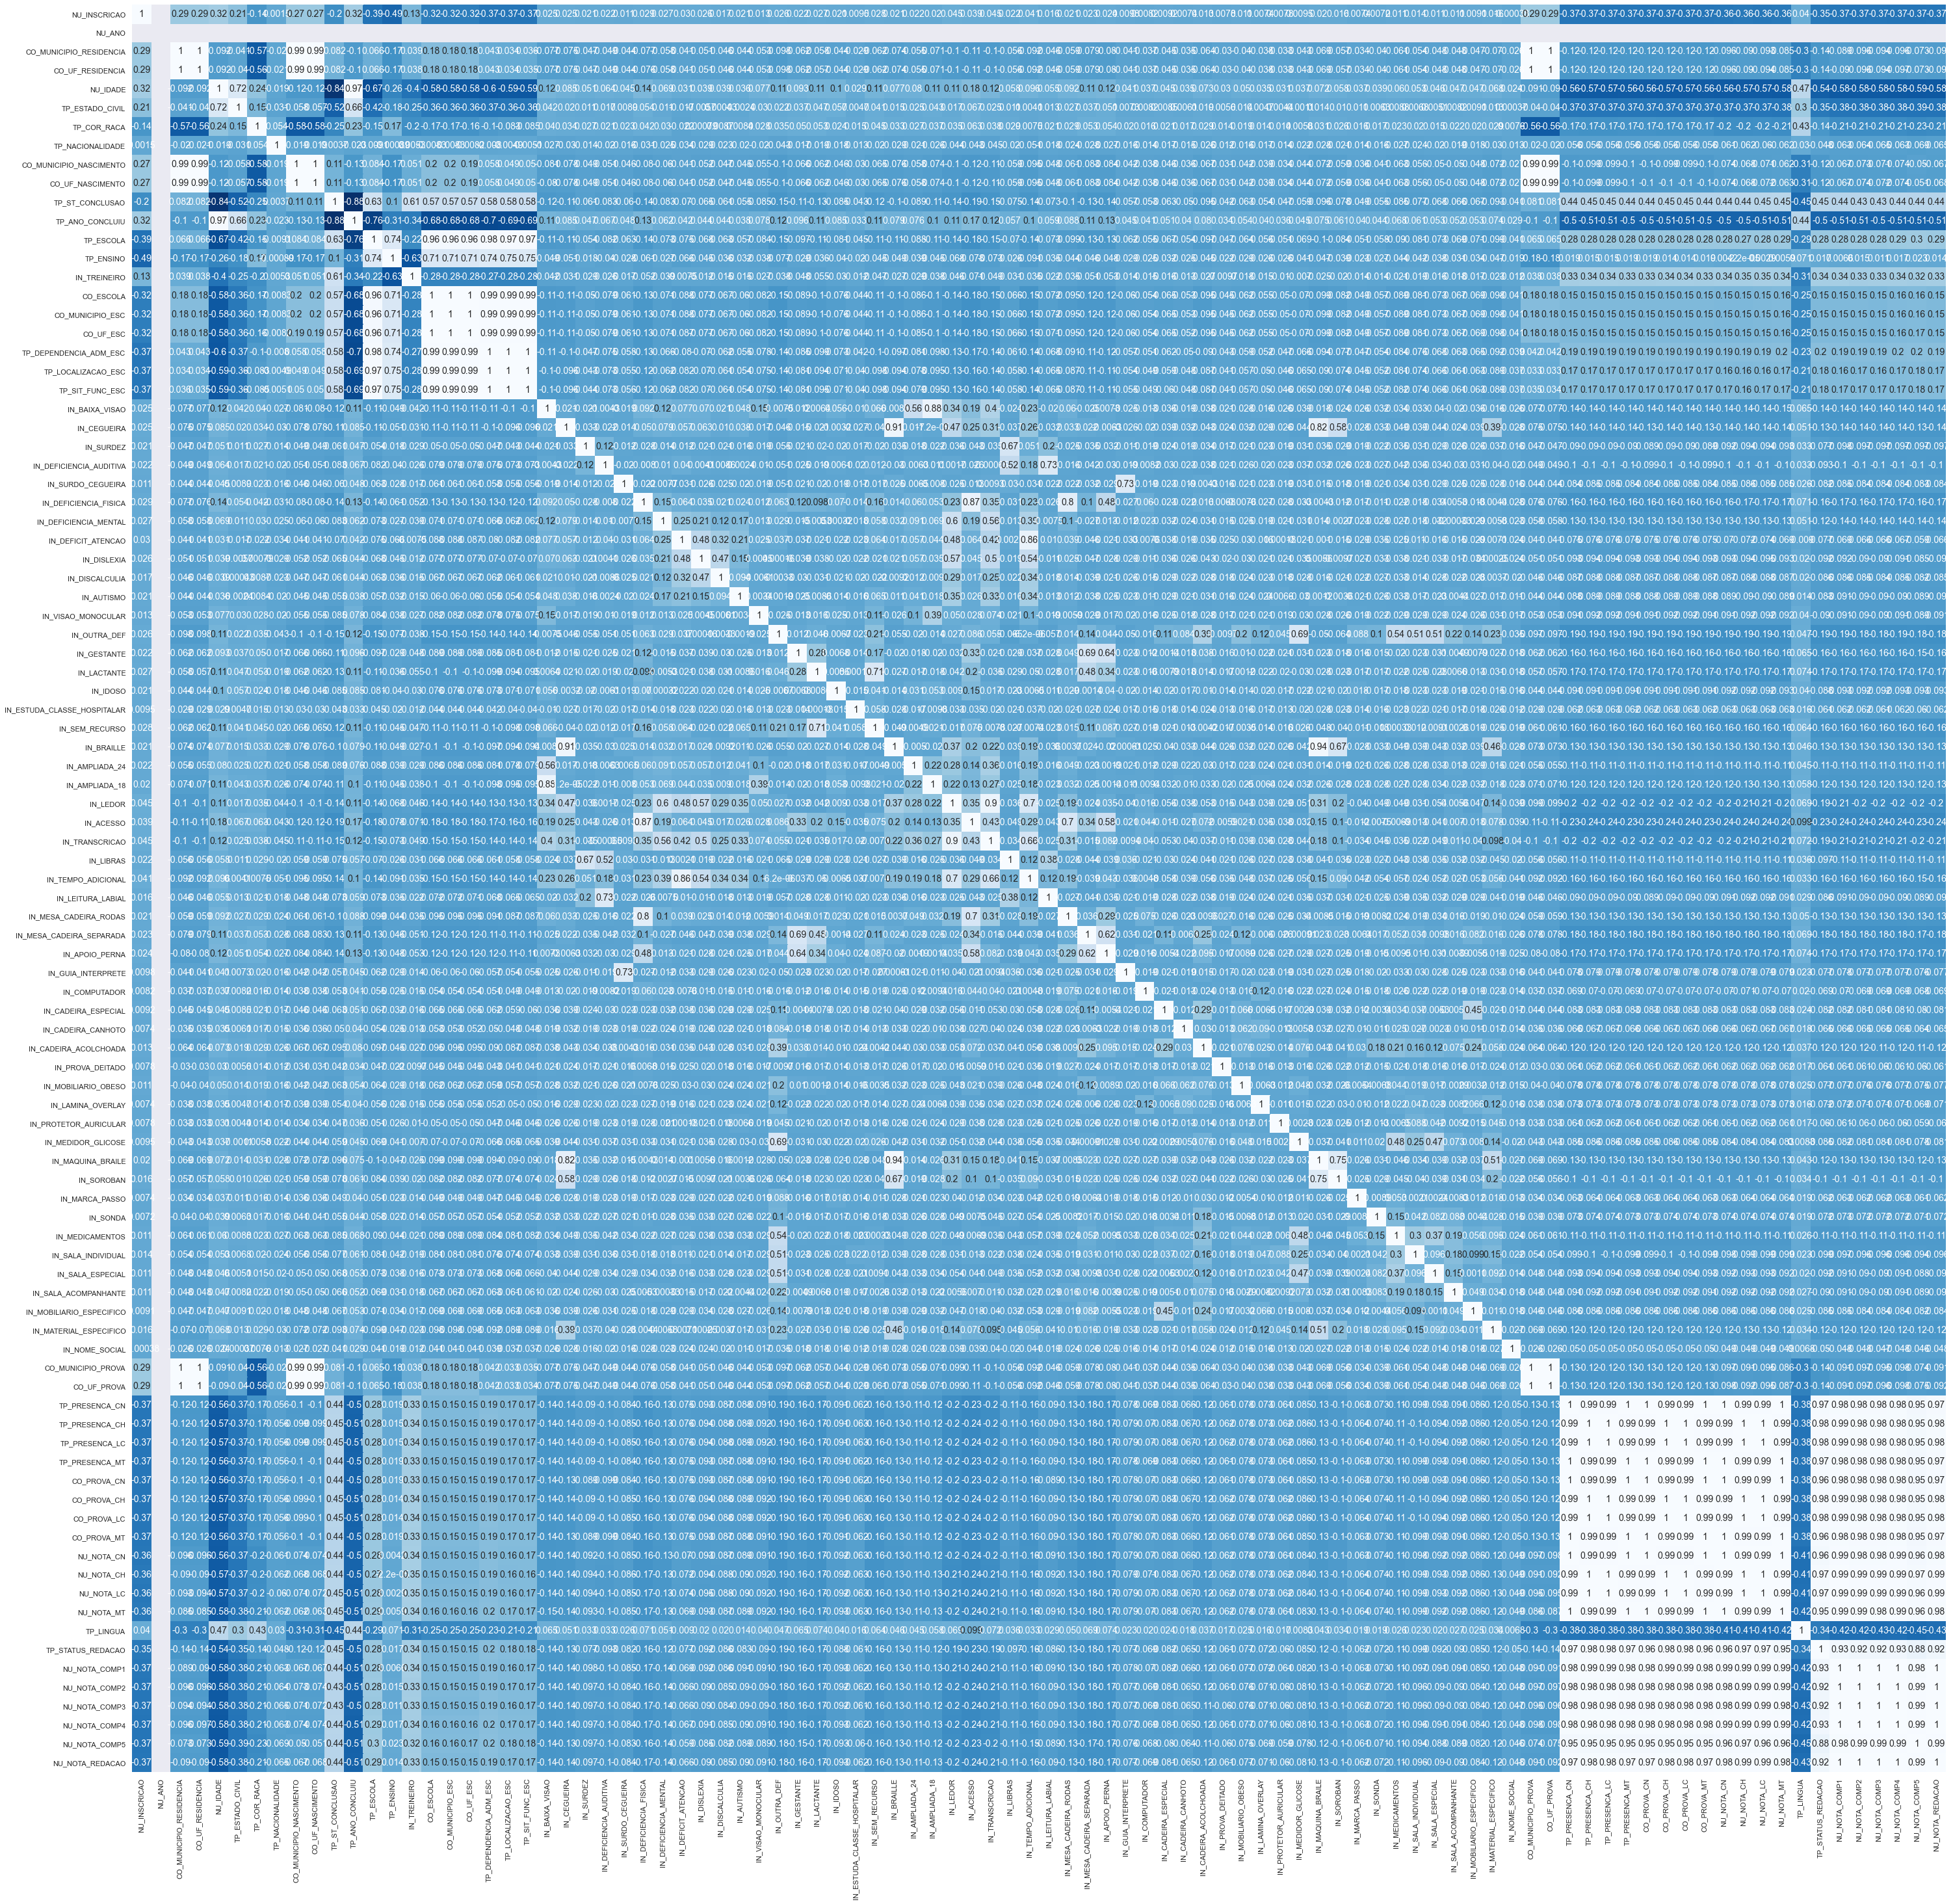

In [16]:
#Exibe as análises dos parâmetros para visualizarmos a um gráfico de calor dos dados, 
# assim temos uma idéia de quais parâmetros tem a maior co-relação entre eles
sns.heatmap(df_correlacao.corr(),annot = True, annot_kws=annot_kws, cmap='Blues_r', cbar = False)

#Abaixo serão realizadas analises com campos identificados de acordo com a correlação

In [17]:
#Relação de idade e Cidade de nascimento com lingua selecionada na prova
df_idade_lingua = df_enem_edit[['NO_MUNICIPIO_NASCIMENTO','NU_IDADE','TP_LINGUA']].reindex()

In [18]:
#Encontra as classificações das idades (quartis)
st.quantiles(df_idade_lingua.NU_IDADE,n=7)

[17.0, 18.0, 19.0, 20.0, 23.0, 28.0]

In [19]:
#Cria uma nova coluna com o grupo de idade de cada registro
df_idade_lingua['QUARTIL_IDADE'] = pd.qcut(df_idade_lingua['NU_IDADE'], 7, ['0-17', '17-18', '18-19', '19-20', '20-23', '23-28','>28'])

In [20]:
df_idade_lingua

NO_MUNICIPIO_NASCIMENTO  NU_IDADE  TP_LINGUA QUARTIL_IDADE
0                       Itabuna      36.0          0           >28
1              Feira de Santana      23.0          0         20-23
2                     Fortaleza      39.0          1           >28
3                        Palmas      25.0          1         23-28
4                      Contagem      22.0          0         20-23
...                         ...       ...        ...           ...
5095265                  Marab�      41.0          0           >28
5095266                Manicor�      20.0          1         19-20
5095267         Bento Gon�alves      21.0          0         20-23
5095268         Bento Gon�alves      22.0          0         20-23
5095269                 Sombrio      21.0          1         20-23

[5095270 rows x 4 columns]

In [21]:
#Agrupar a quantidade de provas por lingua e grupo de idade
df_id_lingua_qdt = df_idade_lingua.groupby(['QUARTIL_IDADE','TP_LINGUA'])['TP_LINGUA'].count().reset_index(name="QUANTIDADE")

In [22]:
df_idade_lingua_per = df_idade_lingua.groupby(['QUARTIL_IDADE','TP_LINGUA'])['TP_LINGUA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL")

In [23]:
df_idade_lingua_per

QUARTIL_IDADE  TP_LINGUA  PERCENTUAL
0           0-17          0   60.646752
1           0-17          1   39.353248
2          17-18          0   51.603937
3          17-18          1   48.396063
4          18-19          0   47.853888
5          18-19          1   52.146112
6          19-20          0   45.541483
7          19-20          1   54.458517
8          20-23          0   42.023099
9          20-23          1   57.976901
10         23-28          0   37.282082
11         23-28          1   62.717918
12           >28          0   34.291777
13           >28          1   65.708223

In [24]:
#Inclui uma coluna com a descrição da lingua escolhida
df_idade_lingua_per['DES_LINGUA'] = df_idade_lingua_per['TP_LINGUA']
df_idade_lingua_per.loc[df_idade_lingua_per['TP_LINGUA'] == 0, 'DES_LINGUA'] = 'Inglês'
df_idade_lingua_per.loc[df_idade_lingua_per['TP_LINGUA'] == 1, 'DES_LINGUA'] = 'Espanhol'

In [25]:
df_idade_lingua_per

QUARTIL_IDADE  TP_LINGUA  PERCENTUAL DES_LINGUA
0           0-17          0   60.646752     Inglês
1           0-17          1   39.353248   Espanhol
2          17-18          0   51.603937     Inglês
3          17-18          1   48.396063   Espanhol
4          18-19          0   47.853888     Inglês
5          18-19          1   52.146112   Espanhol
6          19-20          0   45.541483     Inglês
7          19-20          1   54.458517   Espanhol
8          20-23          0   42.023099     Inglês
9          20-23          1   57.976901   Espanhol
10         23-28          0   37.282082     Inglês
11         23-28          1   62.717918   Espanhol
12           >28          0   34.291777     Inglês
13           >28          1   65.708223   Espanhol

In [26]:
img = pltx.histogram(df_idade_lingua_per, x="QUARTIL_IDADE", y="PERCENTUAL", color="DES_LINGUA",
            title="Língua escolhida por Faixa de Idade",
            #Altera o tamanho do gráfico
            #width=600, height=400,
            labels={ # Alterar o nome original das colunas
                "QUARTIL_IDADE": "Faixa de Idade",  "PERCENTUAL": " % ", "DES_LINGUA": "Língua Escolhida"
            },
            category_orders={ # Troca a ordem original das colunas
                "TP_LINGUA": [1, 0]
            },
            template="simple_white"
            )
img.show()

Conforme análise acima os estudantes mais velhos tem a tendência de escolher o Espanhol, essas informações poderiam ser revertidas em uma ação de marketing para venda de cursos de linguas por uma escola de idiomas ou ações de treinamento e seleção por uma empresa com atualição no mercado externo por exemplo.

In [27]:
###########################################################################
# Análise gráfica da lingua encolhida por localição geográfica
df_municipio_lingua = df_enem_edit[['CO_MUNICIPIO_PROVA','TP_LINGUA']].reindex()

In [28]:
#Calcula o percentual de provas de cada lingua por municipio
df_municipio_lingua_per = df_municipio_lingua.groupby(['CO_MUNICIPIO_PROVA','TP_LINGUA'])['TP_LINGUA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL")

In [29]:
#Inclui uma coluna com a descrição da lingua escolhida
df_municipio_lingua_per['DES_LINGUA'] = df_municipio_lingua_per['TP_LINGUA']
df_municipio_lingua_per.loc[df_municipio_lingua_per['TP_LINGUA'] == 0, 'DES_LINGUA'] = 'Inglês'
df_municipio_lingua_per.loc[df_municipio_lingua_per['TP_LINGUA'] == 1, 'DES_LINGUA'] = 'Espanhol'

In [30]:
#Inclui dados do municipio no dataframe
df_municipio_lingua_per = df_municipio_lingua_per.join(df_munic_ibge.set_index('codigo_ibge'), on='CO_MUNICIPIO_PROVA')

In [31]:
img_map = pltx.scatter_geo(df_municipio_lingua_per.where(df_municipio_lingua_per["TP_LINGUA"] == 0), 
                       lat='latitude', lon='longitude', 
                       color="PERCENTUAL",
                       hover_name="nome", 
                       #size="PERCENTUAL",
                       projection="natural earth",
                       scope='south america',
                       title='Análise de percentual de provas com a lingua INGLÊS',
                       width=800, height=600)
img_map.show()

In [32]:
img_map = pltx.scatter_geo(df_municipio_lingua_per.where(df_municipio_lingua_per["TP_LINGUA"] == 1), 
                       lat='latitude', lon='longitude', 
                       color="PERCENTUAL",
                       hover_name="nome", 
                       #size="PERCENTUAL",
                       projection="natural earth",
                       scope='south america',
                       title='Análise de percentual de provas com a lingua ESPANHOL',
                       width=800, height=600)
img_map.show()

Foi identificado um maior número de provas em espanhol nas cidades de fronteira e também uma grande parcela na região Nordeste do Brasil

In [33]:
###########################################################################
#Análise comparativa entre escolas públicas e particulares

df_escolas_tipo = df_enem_edit[['TP_ESCOLA','TP_COR_RACA','TP_PRESENCA_CN','TP_PRESENCA_CH',
                                'TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH',
                                'NU_NOTA_LC','NU_NOTA_MT','TP_LINGUA','TP_STATUS_REDACAO',
                                'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4',
                                'NU_NOTA_COMP5','NU_NOTA_REDACAO']].where(~df_enem_edit['TP_ESCOLA'].isna()).reindex()

In [49]:
#Inclui uma coluna com a descrição do tipo de escola
df_escolas_tipo['DES_ESCOLA'] = df_escolas_tipo['TP_ESCOLA']
df_escolas_tipo.loc[df_escolas_tipo['TP_ESCOLA'] == 1, 'DES_ESCOLA'] = 'Não Respondeu'
df_escolas_tipo.loc[df_escolas_tipo['TP_ESCOLA'] == 2, 'DES_ESCOLA'] = 'Pública'
df_escolas_tipo.loc[df_escolas_tipo['TP_ESCOLA'] == 3, 'DES_ESCOLA'] = 'Privada'
df_escolas_tipo.loc[df_escolas_tipo['TP_ESCOLA'] == 4, 'DES_ESCOLA'] = 'Exterior'

#Altera o código de presença para descrição
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_CN'] == 0, 'TP_PRESENCA_CN'] = 'Faltou à prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_CN'] == 1, 'TP_PRESENCA_CN'] = 'Presente na prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_CN'] == 2, 'TP_PRESENCA_CN'] = 'Eliminado na prova'

df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_CH'] == 0, 'TP_PRESENCA_CH'] = 'Faltou à prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_CH'] == 1, 'TP_PRESENCA_CH'] = 'Presente na prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_CH'] == 2, 'TP_PRESENCA_CH'] = 'Eliminado na prova'

df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_LC'] == 0, 'TP_PRESENCA_LC'] = 'Faltou à prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_LC'] == 1, 'TP_PRESENCA_LC'] = 'Presente na prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_LC'] == 2, 'TP_PRESENCA_LC'] = 'Eliminado na prova'

df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_MT'] == 0, 'TP_PRESENCA_MT'] = 'Faltou à prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_MT'] == 1, 'TP_PRESENCA_MT'] = 'Presente na prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_PRESENCA_MT'] == 2, 'TP_PRESENCA_MT'] = 'Eliminado na prova'

df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == -1, 'TP_STATUS_REDACAO'] = 'Faltou à prova'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 1, 'TP_STATUS_REDACAO'] = 'Sem problemas'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 2, 'TP_STATUS_REDACAO'] = 'Anulada'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 3, 'TP_STATUS_REDACAO'] = 'Cópia Texto Motivador'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 4, 'TP_STATUS_REDACAO'] = 'Em Branco'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 5, 'TP_STATUS_REDACAO'] = 'Não Respondeu'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 6, 'TP_STATUS_REDACAO'] = 'Fuga ao tema'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 7, 'TP_STATUS_REDACAO'] = 'Não atendimento ao tipo textual'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 8, 'TP_STATUS_REDACAO'] = 'Texto insuficiente'
df_escolas_tipo.loc[df_escolas_tipo['TP_STATUS_REDACAO'] == 9, 'TP_STATUS_REDACAO'] = 'Parte desconectada'

df_escolas_tipo.loc[df_escolas_tipo['TP_COR_RACA'] == 0, 'TP_COR_RACA'] = 'Não declarado'
df_escolas_tipo.loc[df_escolas_tipo['TP_COR_RACA'] == 1, 'TP_COR_RACA'] = 'Branca'
df_escolas_tipo.loc[df_escolas_tipo['TP_COR_RACA'] == 2, 'TP_COR_RACA'] = 'Preta'
df_escolas_tipo.loc[df_escolas_tipo['TP_COR_RACA'] == 3, 'TP_COR_RACA'] = 'Parda'
df_escolas_tipo.loc[df_escolas_tipo['TP_COR_RACA'] == 4, 'TP_COR_RACA'] = 'Amarela'
df_escolas_tipo.loc[df_escolas_tipo['TP_COR_RACA'] == 5, 'TP_COR_RACA'] = 'Indígena'

In [35]:
img = pltx.histogram(df_escolas_tipo.groupby(['DES_ESCOLA','TP_PRESENCA_CN'])['TP_ESCOLA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL"), 
                     x="DES_ESCOLA", y="PERCENTUAL", color="TP_PRESENCA_CN",
                     title="% de Presença nas provas por Tipo de Escola",
                     #Altera o tamanho do gráfico
                     #width=600, height=400,
                     labels={ # Alterar o nome original das colunas
                       "DES_ESCOLA": "Tipo de Escola",  "PERCENTUAL": " % ", "TP_PRESENCA_CN": "Presença em Ciências da Natureza"},
                     category_orders={ # Troca a ordem original das colunas
                       "TP_LINGUA": [1, 0]},
                     template="simple_white"
                     )
img.show()

In [36]:
img = pltx.histogram(df_escolas_tipo.groupby(['DES_ESCOLA','TP_PRESENCA_LC'])['TP_ESCOLA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL"), 
                     x="DES_ESCOLA", y="PERCENTUAL", color="TP_PRESENCA_LC",
                     title="% de Presença nas provas por Tipo de Escola",
                     #Altera o tamanho do gráfico
                     #width=600, height=400,
                     labels={ # Alterar o nome original das colunas
                       "DES_ESCOLA": "Tipo de Escola",  "PERCENTUAL": " % ", "TP_PRESENCA_LC": "Presença em Linguagens e Códigos"},
                     category_orders={ # Troca a ordem original das colunas
                       "TP_LINGUA": [1, 0]},
                     template="simple_white"
                     )
img.show()

In [37]:
img = pltx.histogram(df_escolas_tipo.groupby(['DES_ESCOLA','TP_PRESENCA_MT'])['TP_ESCOLA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL"), 
                     x="DES_ESCOLA", y="PERCENTUAL", color="TP_PRESENCA_MT",
                     title="% de Presença nas provas por Tipo de Escola",
                     #Altera o tamanho do gráfico
                     #width=600, height=400,
                     labels={ # Alterar o nome original das colunas
                       "DES_ESCOLA": "Tipo de Escola",  "PERCENTUAL": " % ", "TP_PRESENCA_MT": "Presença em Matemática"},
                     category_orders={ # Troca a ordem original das colunas
                       "TP_LINGUA": [1, 0]},
                     template="simple_white"
                     )
img.show()

In [38]:
img = pltx.histogram(df_escolas_tipo.groupby(['DES_ESCOLA','TP_STATUS_REDACAO'])['TP_ESCOLA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL"), 
                     x="DES_ESCOLA", y="PERCENTUAL", color="TP_STATUS_REDACAO",
                     title="% de Presença nas provas por Tipo de Escola",
                     #Altera o tamanho do gráfico
                     #width=600, height=400,
                     labels={ # Alterar o nome original das colunas
                       "DES_ESCOLA": "Tipo de Escola",  "PERCENTUAL": " % ", "TP_STATUS_REDACAO": "Status da Redação"},
                     category_orders={ # Troca a ordem original das colunas
                       "TP_LINGUA": [1, 0]},
                     template="simple_white"
                     )
img.show()

In [46]:
img = pltx.histogram(df_escolas_tipo.groupby(['DES_ESCOLA','TP_STATUS_REDACAO'])['NU_NOTA_REDACAO'].median().reset_index(name="MEDIANA"), 
                     x="DES_ESCOLA", y="MEDIANA", color="TP_STATUS_REDACAO",
                     title="Mediana das Notas de Redação por Tipo de Escola",
                     #Altera o tamanho do gráfico
                     #width=600, height=400,
                     labels={ # Alterar o nome original das colunas
                       "DES_ESCOLA": "Tipo de Escola",  "PERCENTUAL": " % ", "TP_STATUS_REDACAO": "Status da Redação"},
                     category_orders={ # Troca a ordem original das colunas
                       "TP_LINGUA": [1, 0]},
                     template="simple_white"
                     )
img.show()

In [58]:
img = pltx.histogram(df_escolas_tipo.groupby(['TP_COR_RACA'])['NU_NOTA_REDACAO'].median().reset_index(name="MEDIANA").sort_values(['MEDIANA'], ascending=False), 
                     x="TP_COR_RACA", y="MEDIANA",
                     title="Mediana das Notas de Redação por Raça Declarada",
                     labels={ # Alterar o nome original das colunas
                       "TP_COR_RACA": "Raça declarada",  "MEDIANA": " Nota Média "},
                     template="simple_white"
                     )
img.show()

In [60]:
df_escolas_tipo.groupby(['DES_ESCOLA','TP_COR_RACA'])['TP_COR_RACA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL")

DES_ESCOLA    TP_COR_RACA  PERCENTUAL
0   Não Respondeu        Amarela    2.279648
1   Não Respondeu         Branca   34.913881
2   Não Respondeu       Indígena    0.609802
3   Não Respondeu  Não declarado    1.936256
4   Não Respondeu          Parda   46.978268
5   Não Respondeu          Preta   13.282145
6         Privada        Amarela    2.376596
7         Privada         Branca   63.750503
8         Privada       Indígena    0.203996
9         Privada  Não declarado    2.225658
10        Privada          Parda   26.039647
11        Privada          Preta    5.403601
12        Pública        Amarela    2.263277
13        Pública         Branca   34.094200
14        Pública       Indígena    0.735852
15        Pública  Não declarado    2.249808
16        Pública          Parda   48.274861
17        Pública          Preta   12.382002

In [61]:
img = pltx.histogram(df_escolas_tipo.groupby(['DES_ESCOLA','TP_COR_RACA'])['TP_COR_RACA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL"), 
                     x="DES_ESCOLA", y="PERCENTUAL", color="TP_COR_RACA",
                     title="% de Presença nas provas por Tipo de Escola",
                     labels={ # Alterar o nome original das colunas
                       "DES_ESCOLA": "Tipo de Escola",  "PERCENTUAL": " % ", "TP_COR_RACA": "Raça declarada"},
                     template="simple_white"
                     )
img.show()

In [71]:
###########################################################################
#Análise comparativa entre renda mediana

df_renda = df_enem[['TP_ESCOLA','TP_COR_RACA','Q006']].where(~df_enem['TP_ESCOLA'].isna()).reindex()

In [72]:
#Altera informações dos códigos para descrição
df_renda['DES_ESCOLA'] = df_renda['TP_ESCOLA']
df_renda.loc[df_renda['TP_ESCOLA'] == 1, 'DES_ESCOLA'] = 'Não Respondeu'
df_renda.loc[df_renda['TP_ESCOLA'] == 2, 'DES_ESCOLA'] = 'Pública'
df_renda.loc[df_renda['TP_ESCOLA'] == 3, 'DES_ESCOLA'] = 'Privada'
df_renda.loc[df_renda['TP_ESCOLA'] == 4, 'DES_ESCOLA'] = 'Exterior'

df_renda.loc[df_renda['TP_COR_RACA'] == 0, 'TP_COR_RACA'] = 'Não declarado'
df_renda.loc[df_renda['TP_COR_RACA'] == 1, 'TP_COR_RACA'] = 'Branca'
df_renda.loc[df_renda['TP_COR_RACA'] == 2, 'TP_COR_RACA'] = 'Preta'
df_renda.loc[df_renda['TP_COR_RACA'] == 3, 'TP_COR_RACA'] = 'Parda'
df_renda.loc[df_renda['TP_COR_RACA'] == 4, 'TP_COR_RACA'] = 'Amarela'
df_renda.loc[df_renda['TP_COR_RACA'] == 5, 'TP_COR_RACA'] = 'Indígena'

df_renda.loc[df_renda['Q006'] == 'A', 'Q006'] = 'Nenhuma renda'
df_renda.loc[df_renda['Q006'] == 'B', 'Q006'] = 'Até 998,00'
df_renda.loc[df_renda['Q006'] == 'C', 'Q006'] = 'De 998,01 até 1.497,00'
df_renda.loc[df_renda['Q006'] == 'D', 'Q006'] = 'De 1.497,01 até 1.996,00'
df_renda.loc[df_renda['Q006'] == 'E', 'Q006'] = 'De 1.996,01 até 2.495,00'
df_renda.loc[df_renda['Q006'] == 'F', 'Q006'] = 'De 2.495,01 até 2.994,00'
df_renda.loc[df_renda['Q006'] == 'G', 'Q006'] = 'De 2.994,01 até 3.992,00'
df_renda.loc[df_renda['Q006'] == 'H', 'Q006'] = 'De 3.992,01 até 4.990,00'
df_renda.loc[df_renda['Q006'] == 'I', 'Q006'] = 'De 4.990,01 até 5.988,00'
df_renda.loc[df_renda['Q006'] == 'J', 'Q006'] = 'De 5.988,01 até 6.986,00'
df_renda.loc[df_renda['Q006'] == 'K', 'Q006'] = 'De 6.986,01 até 7.984,00'
df_renda.loc[df_renda['Q006'] == 'L', 'Q006'] = 'De 7.984,01 até 8.982,00'
df_renda.loc[df_renda['Q006'] == 'M', 'Q006'] = 'De 8.982,01 até 9.980,00'
df_renda.loc[df_renda['Q006'] == 'N', 'Q006'] = 'De 9.980,01 até 11.976,00'
df_renda.loc[df_renda['Q006'] == 'O', 'Q006'] = 'De 11.976,01 até 14.970,00'
df_renda.loc[df_renda['Q006'] == 'P', 'Q006'] = 'De 14.970,01 até 19.960,00'
df_renda.loc[df_renda['Q006'] == 'Q', 'Q006'] = 'Mais de 19.960,00'

In [73]:
df_renda

TP_ESCOLA    TP_COR_RACA                      Q006     DES_ESCOLA
0                1          Parda             Nenhuma renda  Não Respondeu
1                1         Branca    De 998,01 até 1.497,00  Não Respondeu
2                1          Parda                Até 998,00  Não Respondeu
3                1         Branca  De 1.996,01 até 2.495,00  Não Respondeu
4                1         Branca  De 2.994,01 até 3.992,00  Não Respondeu
...            ...            ...                       ...            ...
5095265          1          Parda    De 998,01 até 1.497,00  Não Respondeu
5095266          1          Parda    De 998,01 até 1.497,00  Não Respondeu
5095267          1  Não declarado    De 998,01 até 1.497,00  Não Respondeu
5095268          1  Não declarado             Nenhuma renda  Não Respondeu
5095269          1  Não declarado    De 998,01 até 1.497,00  Não Respondeu

[5095270 rows x 4 columns]

In [79]:
img = pltx.histogram(df_renda.groupby(['DES_ESCOLA','Q006'])['TP_ESCOLA'].count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name="PERCENTUAL").sort_values(['PERCENTUAL'], ascending=True), 
                     x="DES_ESCOLA", y="PERCENTUAL", color="Q006",
                     title="% de Presença nas provas por Tipo de Escola",
                     labels={ # Alterar o nome original das colunas
                       "DES_ESCOLA": "Tipo de Escola",  "PERCENTUAL": " % ", "Q006": "Renda Familiar"},
                     template="simple_white"
                     )
img.show()